 ### Compared and Tabulated the values of classifiers using Vote ensemble method and applied Bootstrap aggregation (Bagging) and Random subspacing techniques. 

### Used data from weka and voting to classifiers and compared classifiers by their scores and highlighted the values in tables and compared the best comparision highlighted in colour green

#### 1.1. Evaluate the performance of three basic classifiers on your dataset: Decision Tree, Neural Network and kNN (k=1). Carefully consider the evaluation measure(s) that you use for this exercise and justify why you selected the particular evaluation measure(s). Use the Weka Vote ensemble method (meta -> Vote) to combine the Decision Tree, Neural Network and 1-NN classifiers. Evaluate the performance of the Vote ensemble method with 3 different combination rules (there are 6 possibilities: Average of probabilities, Product of probabilities, Majority voting, Minimum probability, Maximum probability, Median). Provide a justification for the difference in accuracy when using different combination rules.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('tesco_22202150.csv')

In [7]:
X=final.drop(['Diabetes category','area_id'],axis=1)
y = final['Diabetes category']

In [6]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [23]:
# Import the Classifier.

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

dtree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto')

dtree.fit(X_train,y_train)
clf.fit(X_train, y_train)
knn.fit(X_train, y_train)

print('Classified the Classifiers')

Classified the Classifiers


In [16]:
dtreepred = dtree.predict(X_test)
clfpred = clf.predict(X_test)
knnpred = knn.predict(X_test)

#### Decision Tree

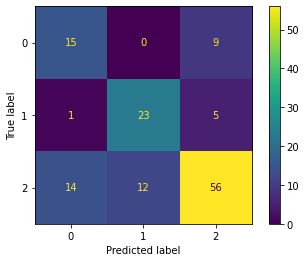

In [19]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

actual = y_test.array
predicted = dtreepred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.show()

#### Neural Network

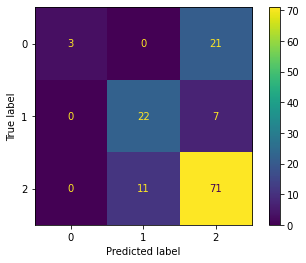

In [20]:
confusion_matrix = metrics.confusion_matrix(y_test, clfpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

#### KNN Classification

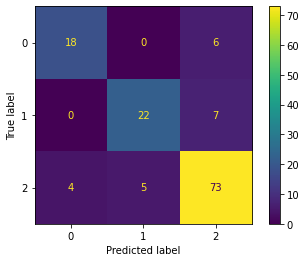

In [21]:
confusion_matrix = metrics.confusion_matrix(y_test, knnpred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

#### Evaluation Measures

In [56]:
DTMeasures = metrics.classification_report(y_test,dtreepred,output_dict=True)
DTAnalysis = pd.DataFrame(DTMeasures).transpose()
DTAnalysis

,precision,recall,f1-score,support
0,0.500000,0.625000,0.555556,24.000000
1,0.657143,0.793103,0.718750,29.000000
2,0.800000,0.682927,0.736842,82.000000
accuracy,0.696296,0.696296,0.696296,0.696296
macro avg,0.652381,0.700343,0.670383,135.000000
weighted avg,0.715979,0.696296,0.700727,135.000000


In [55]:
NNMeasures = metrics.classification_report(y_test,clfpred,output_dict=True)
NNAnalysis = pd.DataFrame(NNMeasures).transpose()
NNAnalysis

,precision,recall,f1-score,support
0,1.000000,0.125000,0.222222,24.000000
1,0.666667,0.758621,0.709677,29.000000
2,0.717172,0.865854,0.784530,82.000000
accuracy,0.711111,0.711111,0.711111,0.711111
macro avg,0.794613,0.583158,0.572143,135.000000
weighted avg,0.756603,0.711111,0.668485,135.000000


In [54]:
knnMeasures = metrics.classification_report(y_test, knnpred,output_dict=True)
knnAnalysis = pd.DataFrame(knnMeasures).transpose()
knnAnalysis

,precision,recall,f1-score,support
0,0.818182,0.750000,0.782609,24.000000
1,0.814815,0.758621,0.785714,29.000000
2,0.848837,0.890244,0.869048,82.000000
accuracy,0.837037,0.837037,0.837037,0.837037
macro avg,0.827278,0.799622,0.812457,135.000000
weighted avg,0.836079,0.837037,0.835779,135.000000


##### The dataset analysed with the Classifiers: Decision Tree, Neural Networks, KNN. The best classifier that predicts the data with classified classifiers is KNN. The different evaluation measures of the classifiers were predicted and are considered and compared with the Accuracy, Precision, Recall, F score. The accuracy is firstly considered and if it is same with the other classifier then analysed with the F score. The KNN accuracy is 83 percent, whereas the decision tree is 69 and the neural network is 71. So, KNN is the best classifier for the dataset considered.

####   Evaluate the performance of the Vote ensemble method with 3 different combination rules (there are 6 possibilities: Average of probabilities, Product of probabilities, Majority voting, Minimum probability, Maximum probability, Median). Provide a justification for the difference in accuracy when using different combination rules

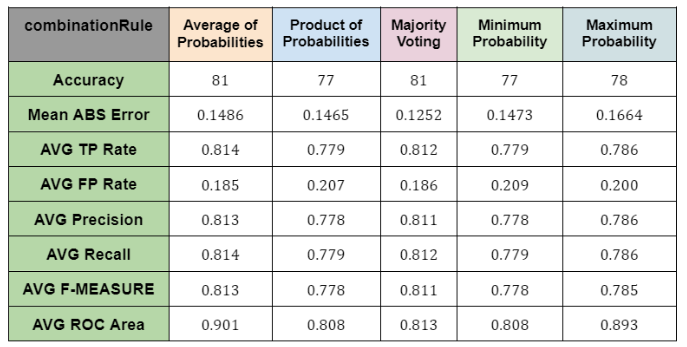

##### The Vote in meta where Class for combining classifiers. Different combinations of probability estimated for classification are available. this is used in the studies of both the negative and positive case studies in analysing the dataset in significant ways of voting with different Combination Rules. Similar to the voting process that is held with different analysis of rules, it can be analysed with a few majorities namely Average of Probabilities, Product of Probabilities, Majority Voting, Minimum Probability, Maximum Probability. From the voting performed with different combination rules, Average of Probabilities is the best combination rule that gives the best accuracy and few combination rules applied gives the same accuracy then for alternative method of deciding the best rule compared with of F1 measure then can predict how efficient the rule predicts the data. So, firstly considered the highest accuracy and if same then considered with the F1 measure.  

#### 1.2 Some of the features may be correlated with others or have dependencies on other features. Build a linear regression model to predict the carb feature from this set of features: f_beer, f_dairy, f_eggs, f_fats_oils, f_fish, f_fruit_veg, f_grains, f_meat_red, f_poultry, f_readymade, f_sauces, f_soft_drinks, f_spirits, f_sweets, f_tea_coffee, f_water, f_wine. Weka chooses the feature which minimises the residual error- which feature does it find? Show the regression model and comment on the quality of the model.

##### When dealing with the Regression Prediction is the important element when considering the model to justify the dataset considered. It has the ability to deal with weighted Instances. Firstly filtered the data with the required set of features. The features with the Carb predicted with the other features, applied the regression model and RMSE is analysed with the crossfolds and the 0.764 is considered the measure of the dataset considered. The RMSE defines the  absolute fit of the data that enhances the model to correlate with the straight line to predict the regression on the dataset considered.

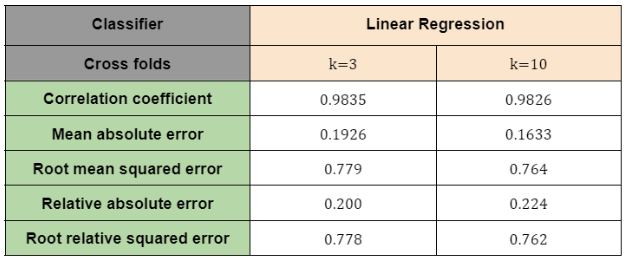

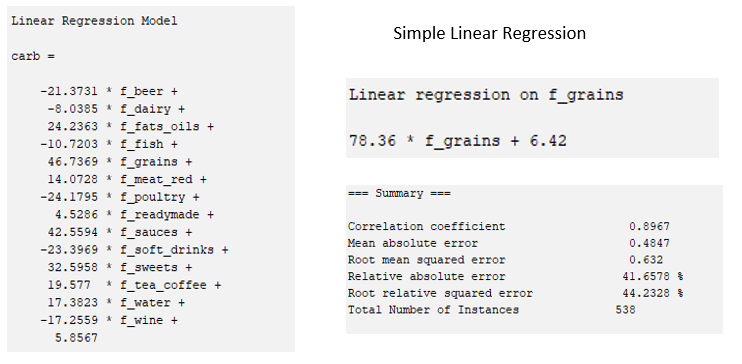

##### The feature minimises of the residual error from the features selected: f_eggs, f_fruit_veg, f_spirits. Using the Simple linear Regression the f_grains were minimal root mean square. From the considerded features the minimum residual error features from the considerded features were observed. The Compared measured with of the selected features where the RMSE is considered it is always efficient to enhnace how well the model fit for training the data with of required measures. So,The RMSE is considerded for finding how well the model applied to the dataset. So, above table states the measure carried out using Linear Regression. Where as Correlation quantifies the direction and strength of the relationship between two numeric variables and lies between -0.1 to 1.0 and this is considered if RMSE matches with one another. 

#### 1.3. Return to the full data set and apply ensembles with bagging using the three classifiers from Task (a). Investigate the performance of these classifiers as the ensemble size increases (e.g., in steps of 2 from 2 to 20 members). Using the best performing ensemble size, investigate how changing the number of instances in the bootstrap samples affects classification performance (i.e. the “bag size”)

##### Bagging is commonly known as Bootstrap aggregation. Classifying the data is important, whereas enhancing it in analysing different predictions is very important. Using the ensembles technique to the data will improve the prediction in a stable manner with competing accurate measures. Bagging is used to reduce variance within a noisy dataset. Multiple models can be predicted using the ensembles by combining all to the one form one accurate model of defining how well the data has been predicted. The compared data will enhance the prediction by iterating the samples in the dataset where the iterations have been observed for the three classifiers and predicted the best  iteration that suits the model in improving the prediction.  The number of samples iterated form 2 to 20 with of difference of 2 each with three classifiers. 

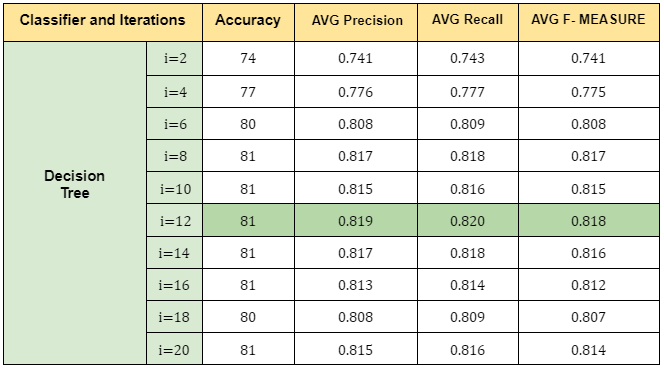

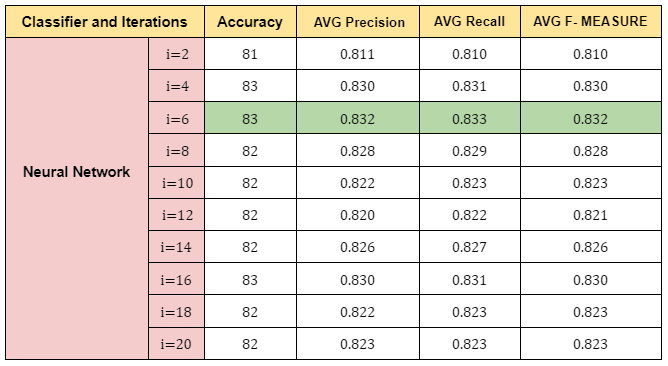

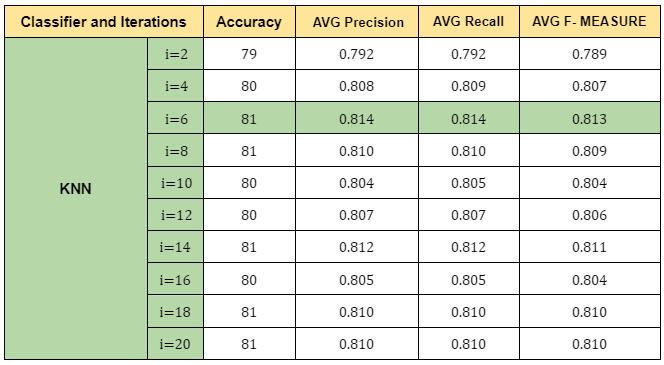

##### Using the Decision Tree the best iteration that the improved prediction is for i=12, for 12 sample that the accuracy is high and considerded. For the Neural Network the best iteration is i=6 and this holds the high accuracy and for the KNN the best iteration is at i=6. 

#### 1.4. Apply ensembles with random subspacing using the three classifiers from Task (a). Investigate the performance of these classifiers as the ensemble size increases (e.g., in steps of 2 from 2 to 20 members). Using the best performing ensemble size, investigate how changing the number of features used when applying random subspacing affects classification performance (i.e. the “subspace size”)


##### Random subspaces are specially used in combining multiple models with trained data, similarly like bagging the iterations were carried out. This method creates the decision tree based classifier that maintains highest accuracy on training data and improves on generalisation accuracy as it grows in complex. The classifier consists of multiple trees constructed systematically by pseudorandomly selecting subsets of components of the feature vector, that is, trees constructed in randomly chosen subspaces.The number of samples iterated form 2 to 20 with of difference of 2 each with three classifiers. 

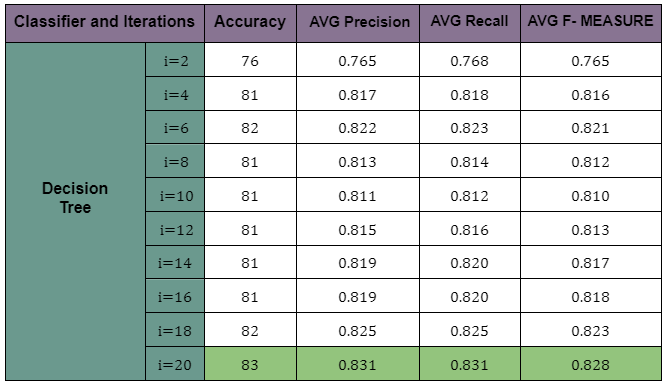

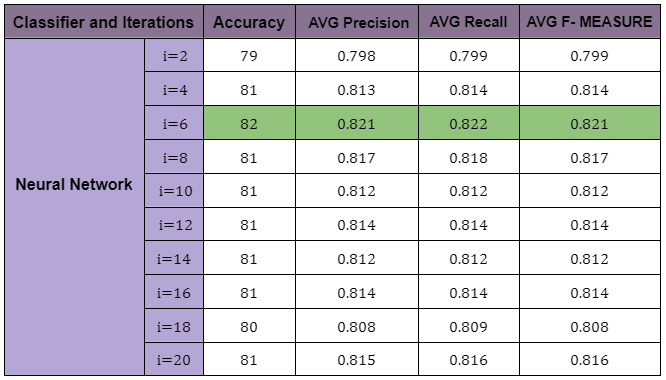

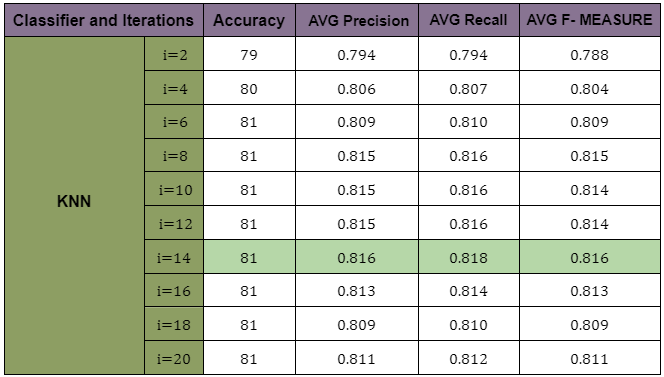

##### Using the Decision Tree the best iteration that the improved prediction is for i=20, for 20 sample that the accuracy is high and considerded. For the Neural Network the best iteration is i=6 and this holds the high accuracy and for the KNN the best iteration is at i=14. The different accuracy is been carried out for each iteration when samples were divided into the iterations for finding the improved predictions that the iteration meets the highest accuracy where to define the best predictive analysis of the dataset applied with of the classifier.  

#### 1.5. Based on the lectures, which set of classifiers is expected to benefit from bagging techniques more and which set of classifiers is expected to benefit from random subspacing techniques more? For your dataset, determine the best ensemble strategy for each of these classifiers. Discuss if this is in line with what you expected.

##### Stating that Bagging techniques avoid overfitting and make the model to enhance the better predictions. The Bagging is used for both the regression and classifier models. The decision tree is more confined in handling the ensembles than that of the other classification. The Dataset considered from the applied bagging techniques comparing the better results of among the three classifiers for Bagging the Neural networks predict the highest accuracy compared to that of the decision tree and KNN. But it’s not meant by improving the size of the training set. The model will be improved forcefully, it only makes sure that it just decreases the variance and tunes the prediction for expected output. But by default this ensemble works by reducing noisy data within the dataset. The major concern is if bagging is used then it makes losses of interpretability of the model. The decision tree is very efficient in the ensemble model of bagging technique, but it makes the other classifiers to enhance the prediction and multiple prediction is carried out within the single prediction of improved prediction. It is a parallel ensemble technique.  Below were the highest measured accuracy of  three classifiers of the dataset considerded. 


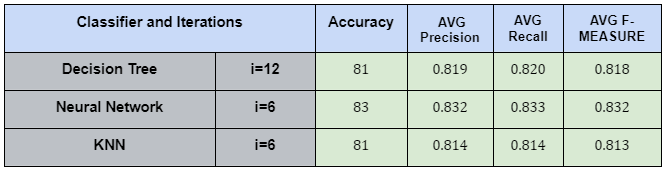

##### By default the motto of the Random Subspace were the predictions from multiple decision trees trained on different subsets of columns in the training dataset. The most commonly used of oftenly used is Decision Tree for defined the Random Subspace where the maximum multiple predictions decision trees can be handled with improved techniques. The higher the target value the higher the inputs and outputs. With the considered dataset the best classifier that predicts the highest accuracy is Decision Tree and even its meaning over here enhancing the size will only make the multiple models to coverage of improving the predictive analysis not the improving of the model. Random Subspace will improve the model by combining the multiple model focus of the decision tree on different dataset of one to one variable of the dataset. 


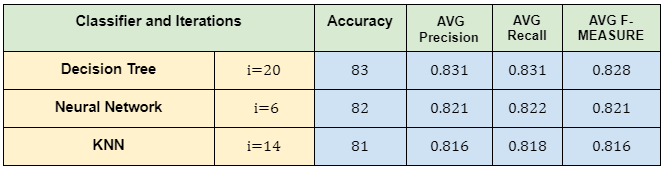

#####  The ensemble for the dataset considered with various rules and meta combinations used were defined as to the best of its accuracy, The iterations made with of different samples these considered as to that of the improved prediction. This ensemble makes the classifier in making the prediction with improved accuracy to the applied dataset. The handled dataset with the enhancement of various ensembles makes the classifier fit the data to its maximum of measures applied. The measures applied to that of the considered classifiers, for KNN the best ensemble that makes the model to fit with of maximum is bagging technique made this model to fit to its maximum iterations of 6, were as for Decision Tree classifier ensures the Random SubSpace  make the fit maximum to that making the prediction with accurate measures. The Neural networks fits best with the bagging technique in making the variance so low that it reduces the noisy data considered in the dataset. So, by using these ensembles it is confined to making the classifiers to improve the prediction of data in a possible manner of achieving the target for analysing the behaviour of the dataset with enhanced manner of considering the classifier or regression that is applicable to the dataset considered.